In [1]:
import pandas as pd
import numpy as np

Data Preprocessing

In [2]:
data=pd.read_csv("flipkart_product.csv", encoding='latin1')
print(data.head(10))

                                         ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
5  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
6  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
7  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
8  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
9  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    4   

               Review                                            Summary  
0              Super!  Great cooler.. excellent air flow and for this...  
1             Awesome             Best budget 2 fit cooler. Nice coo

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [4]:
data.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [5]:
print(data['Price'])

0         ??3,999
1         ??3,999
2         ??3,999
3         ??3,999
4         ??3,999
            ...   
189869      â¹142
189870      â¹142
189871      â¹142
189872      â¹142
189873         NaN
Name: Price, Length: 189874, dtype: object


In [6]:
data.nunique()

ProductName      812
Price            561
Rate               9
Review          1264
Summary        98343
dtype: int64

In [7]:
def check_price(price):
    try:
        float(price.replace('₹', '').replace(',', ''))
        return True
    except:
        return False
problematic_prices = data[~(data['Price'].apply(check_price))]
print(problematic_prices['Price'])

0         ??3,999
1         ??3,999
2         ??3,999
3         ??3,999
4         ??3,999
            ...   
189869      â¹142
189870      â¹142
189871      â¹142
189872      â¹142
189873         NaN
Name: Price, Length: 189874, dtype: object


In [8]:
import re
import time
def clean_price(price):
    if(pd.isna(price)):
        return None
    else:
        price=str(price).replace('₹', '').replace(',', '')
        cleaned_price=re.search(r'\d+\.?\d*', price)
        cleaned_price = cleaned_price.group(0) if cleaned_price else None
        return cleaned_price if cleaned_price else None
    
data['Cleaned_Price'] = data['Price'].apply(clean_price)
print(data['Cleaned_Price'].head(10))

0    3999
1    3999
2    3999
3    3999
4    3999
5    3999
6    3999
7    3999
8    3999
9    3999
Name: Cleaned_Price, dtype: object


In [9]:
data['Cleaned_Price'].to_csv("cleaned_prices.csv", index=False)

In [10]:
data.head()

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,3999
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,3999
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,3999
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,3999
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,3999


In [11]:
data['Cleaned_Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 189874 entries, 0 to 189873
Series name: Cleaned_Price
Non-Null Count   Dtype 
--------------   ----- 
189873 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [12]:
data.isnull().sum()

ProductName       0
Price             1
Rate              1
Review            4
Summary          14
Cleaned_Price     1
dtype: int64

In [13]:
data['Cleaned_Price'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
189869    False
189870    False
189871    False
189872    False
189873     True
Name: Cleaned_Price, Length: 189874, dtype: bool

In [14]:
data

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,3999
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,3999
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,3999
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,3999
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,3999
...,...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks,142
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good,142
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super,142
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good,142


In [15]:
data['Cleaned_Price']=pd.to_numeric(data['Cleaned_Price'])

In [16]:
print("Rows with Nan after cleaning:", data['Cleaned_Price'].isnull().sum())
data['Cleaned_Price'].describe()

Rows with Nan after cleaning: 1


count    189873.000000
mean       4347.316846
std       10202.270993
min           1.500000
25%         339.000000
50%         699.000000
75%        3399.000000
max       86990.000000
Name: Cleaned_Price, dtype: float64

In [17]:
data=data.dropna(subset=['Cleaned_Price'])

In [18]:
data['Price']=data['Cleaned_Price']

C:\Users\anasm\AppData\Local\Temp\ipykernel_17140\2459637827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price']=data['Cleaned_Price']


In [19]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,3999.0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,3999.0
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...,3999.0
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan,3999.0
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product,3999.0
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,The cooler is really fantastic and provides go...,3999.0
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Highly recommended,Very good product,3999.0
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Nice,Very nice,3999.0
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Unsatisfactory,Very bad cooler,3999.0
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,4,Worth the money,Very good,3999.0


In [20]:
data.drop('Cleaned_Price', axis=1, inplace=True)

C:\Users\anasm\AppData\Local\Temp\ipykernel_17140\1140691161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Cleaned_Price', axis=1, inplace=True)


In [21]:
data.head(10)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,The cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Highly recommended,Very good product
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Nice,Very nice
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Unsatisfactory,Very bad cooler
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,4,Worth the money,Very good


In [22]:
data.isnull().sum()

ProductName     0
Price           0
Rate            0
Review          3
Summary        13
dtype: int64

In [23]:
data=data.dropna(subset=['Summary'])
data['Review']=data['Review'].fillna('No Review found in this')


In [24]:
data['Rate']=pd.to_numeric(data['Rate'],errors='coerce')
data.dropna(subset=['Rate'], inplace=True)
data['Rate'] = data['Rate'].astype(int)
data['Rate'].describe()

count    189856.000000
mean          4.114387
std           1.304905
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rate, dtype: float64

In [25]:
data.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [26]:
import re
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
data['Review'] = data['Review'].apply(clean_text)
data['Review'].head(10)

0                 Super
1               Awesome
2                  Fair
3       Useless product
4                  Fair
5               Awesome
6    Highly recommended
7                  Nice
8        Unsatisfactory
9       Worth the money
Name: Review, dtype: object

In [27]:
data['ProductName'] = data['ProductName'].apply(clean_text)
data['ProductName'].head(10)
data['Summary'] = data['Summary'].apply(clean_text)
data['Summary'].head(10)

0    Great cooler excellent air flow and for this p...
1                Best budget 2 fit cooler Nice cooling
2    The quality is good but the power of air is de...
3                    Very bad product its a only a fan
4                                        Ok ok product
5    The cooler is really fantastic and provides go...
6                                    Very good product
7                                            Very nice
8                                      Very bad cooler
9                                            Very good
Name: Summary, dtype: object

In [28]:
def lowercase_text(text):
    return text.lower() if isinstance(text, str) else text

In [29]:
data['ProductName'] = data['ProductName'].apply(lowercase_text)
data['Summary'] = data['Summary'].apply(lowercase_text)
data['Review'] = data['Review'].apply(lowercase_text)
data.head(10)

,ProductName,Price,Rate,Review,Summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good


In [30]:
def rate_to_category(rate):
    if rate >= 4:
        return 'positive'
    elif rate == 3:
        return 'neutral'
    else:
        return 'negative'
data['Sentiment_from_rate'] = data['Rate'].apply(rate_to_category)
data['Sentiment_from_rate'].value_counts()

Sentiment_from_rate
positive    148335
negative     25841
neutral      15680
Name: count, dtype: int64

In [31]:
data.head()

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral


In [32]:
data1 = pd.read_csv("cleaned_flipkart_product.csv")
data1['Summary']=data1['Summary'].astype(str)

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia= SentimentIntensityAnalyzer()

data['Summary_Sentiment'] = data['Summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
data['Sentiment_from_summary'] = data['Summary_Sentiment'].apply(classify_sentiment)
data['Sentiment_from_summary'].value_counts()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anasm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_from_summary
positive    150370
negative     22005
neutral      17481
Name: count, dtype: int64

In [34]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate,Summary_Sentiment,Sentiment_from_summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive,0.9576,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive,0.8591,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral,0.2382,positive
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative,-0.3597,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral,0.5267,positive
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...,positive,0.8354,positive
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product,positive,0.4927,positive
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice,neutral,0.4754,positive
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler,negative,-0.5849,negative
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good,positive,0.4927,positive


In [35]:
compare=pd.crosstab(data['Sentiment_from_rate'], data['Sentiment_from_summary'])
print(compare)

Sentiment_from_summary  negative  neutral  positive
Sentiment_from_rate                                
negative                   17325     5624      2892
neutral                     2596     2647     10437
positive                    2084     9210    137041


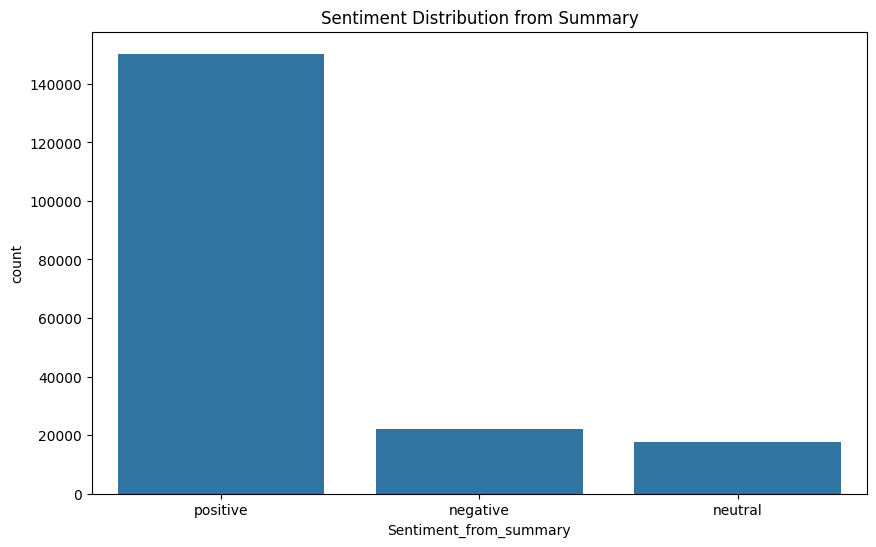

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_from_summary', data=data)
plt.title('Sentiment Distribution from Summary')
plt.show()

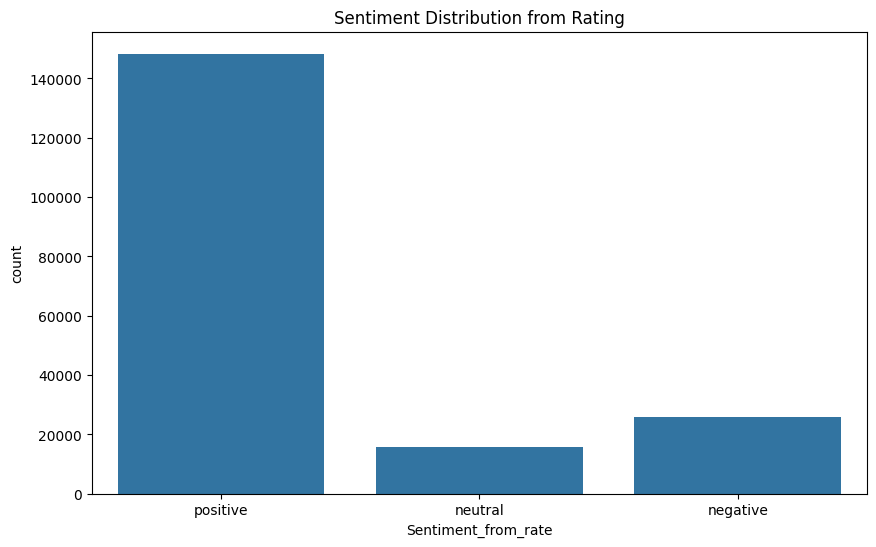

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_from_rate', data=data)
plt.title('Sentiment Distribution from Rating')
plt.show()

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189856 entries, 0 to 189855
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ProductName          189856 non-null  object 
 1   Price                189856 non-null  float64
 2   Rate                 189856 non-null  int64  
 3   Review               169002 non-null  object 
 4   Summary              189856 non-null  object 
 5   Sentiment_from_rate  189856 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.7+ MB


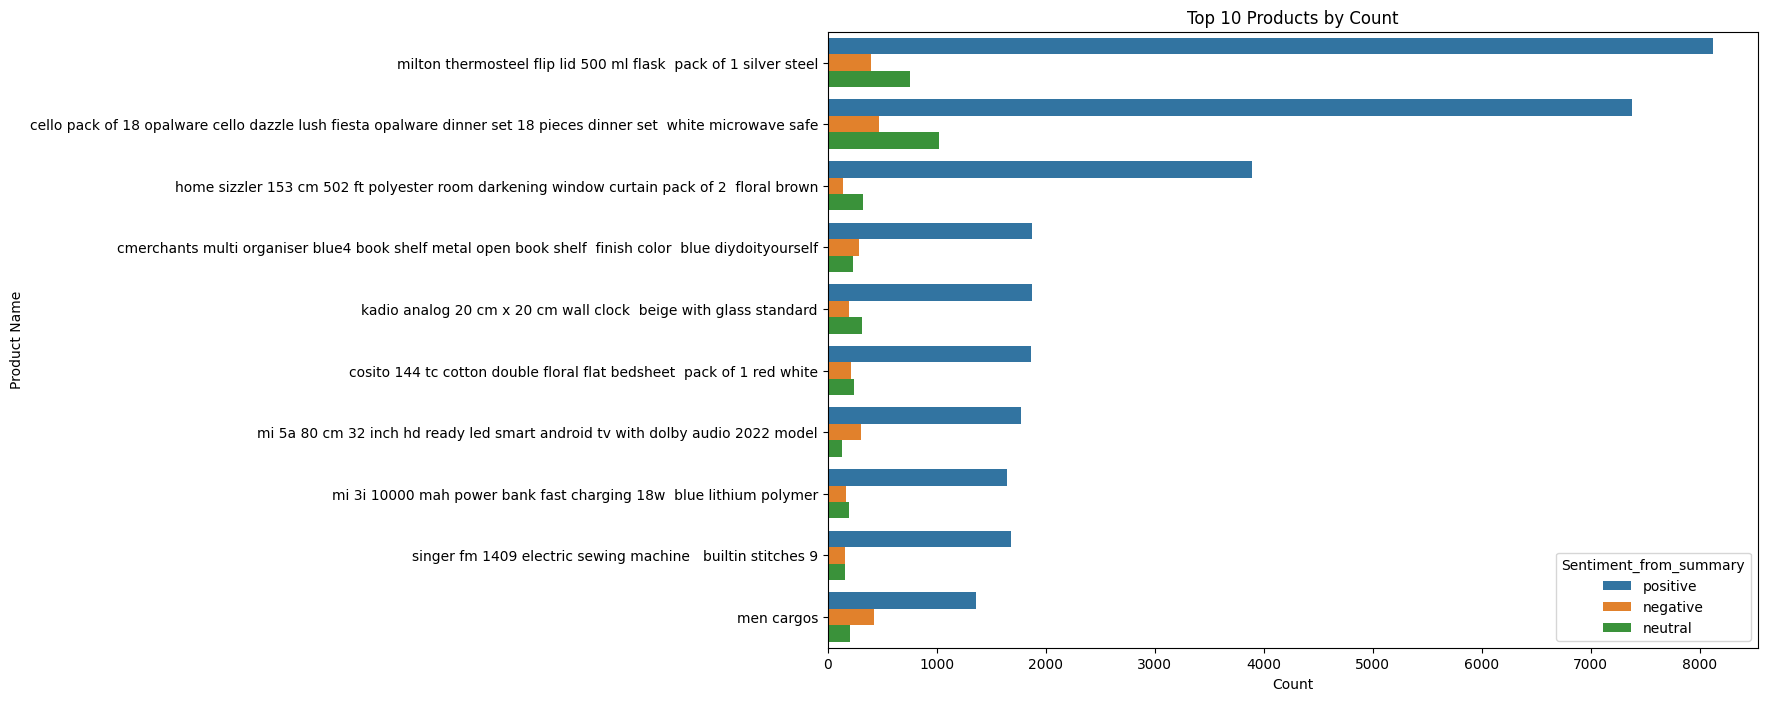

In [39]:
plt.figure(figsize=(12, 8))
top_products=data['ProductName'].value_counts().index[:10]
top_products_data=data[data['ProductName'].isin(top_products)]
sns.countplot(y='ProductName', hue='Sentiment_from_summary', data=top_products_data, order=top_products_data['ProductName'].value_counts().index)
plt.title('Top 10 Products by Count')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

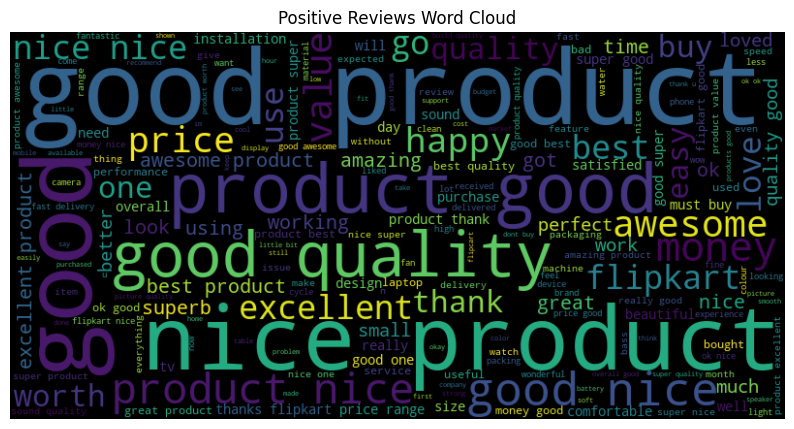

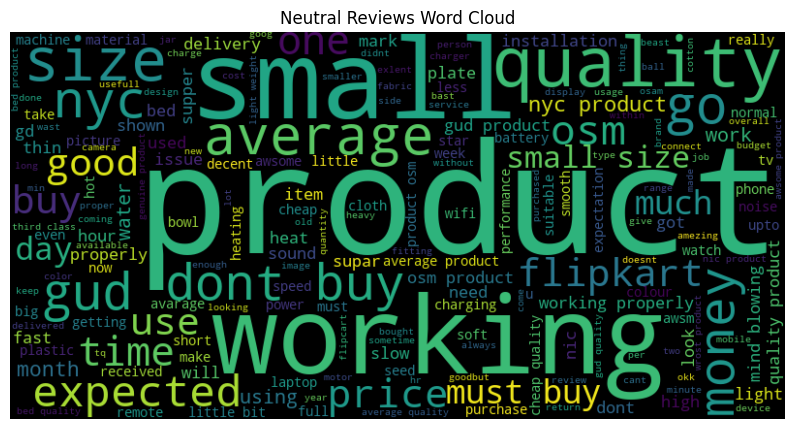

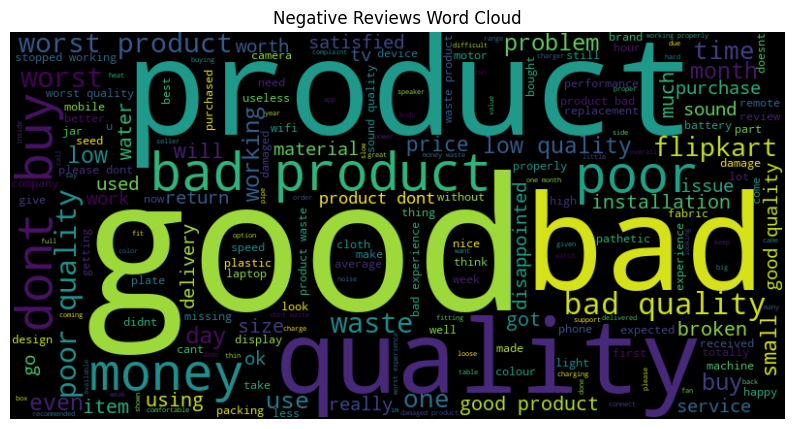

In [40]:
positive_reviews=' '.join(data[data['Sentiment_from_summary']=='positive']['Summary'])
neutral_reviews=' '.join(data[data['Sentiment_from_summary']=='neutral']['Summary'])
negative_reviews=' '.join(data[data['Sentiment_from_summary']=='negative']['Summary'])

plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 6))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [41]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate,Summary_Sentiment,Sentiment_from_summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive,0.9576,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive,0.8591,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral,0.2382,positive
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative,-0.3597,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral,0.5267,positive
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...,positive,0.8354,positive
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product,positive,0.4927,positive
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice,neutral,0.4754,positive
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler,negative,-0.5849,negative
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good,positive,0.4927,positive


In [42]:
data['Sentiment_from_summary'].value_counts()

Sentiment_from_summary
positive    150370
negative     22005
neutral      17481
Name: count, dtype: int64

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Use Summary column for analysis
texts = data['Summary'].values
labels = data['Rate'].apply(lambda x: 1 if x >= 4 else (0 if x == 3 else -1)).values

# Tokenization
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(np.array(labels) + 1, num_classes=3)  # Shift to 0, 1, 2 for categorical

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow GPU device found:", tf.test.is_built_with_cuda())

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

# Force TensorFlow to use GPU
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))  # Embedding layer
    model.add(LSTM(64, return_sequences=False))                 # LSTM layer
    model.add(Dropout(0.2))                                    # Dropout to prevent overfitting
    model.add(Dense(3, activation='softmax'))                   # Output layer (3 classes: Neg, Neu, Pos)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Num GPUs Available:  0
TensorFlow GPU device found: False


NameError: name 'max_words' is not defined

In [47]:
# Add callbacks to monitor GPU usage
from tensorflow.keras.callbacks import TensorBoard
import time
from datetime import datetime

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# Train with GPU monitoring
history = model.fit(
    X_train, 
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tensorboard_callback],
    verbose=1  # Show progress bar with GPU usage
)

Epoch 1/100
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.8700 - loss: 0.3993 - val_accuracy: 0.9010 - val_loss: 0.3075
Epoch 2/100
1228/3798 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9023 - loss: 0.2927

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: []
